### Random forests information

Using digit dataset for our example like the one we could use for support Vector Classifier.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [3]:
series = [10, 25, 50, 100, 150, 200, 250, 300]
rf = RandomForestClassifier(random_state=101)
train_scores, test_scores = validation_curve(rf, 
                                            X, y, 'n_estimators', param_range=series, 
                                            cv=10, scoring='accuracy', n_jobs=1)

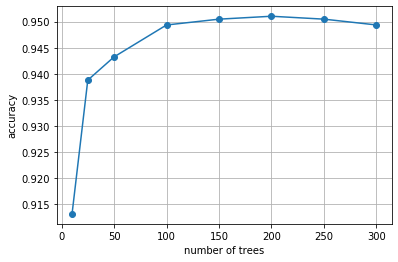

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(series, np.mean(test_scores, axis=1), '-o')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.grid()
plt.show()

# The folllowing example leverages the bagging function provided by sklearn to determine whether decision trees, perceptron, or knn algorithm is for handwritten digit recognition

In [5]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [36]:
DT = cross_val_score(AdaBoostClassifier(
        DecisionTreeClassifier(),
        random_state=0), X, y,
        scoring='accuracy', cv=9)

In [37]:
P = cross_val_score(AdaBoostClassifier(
        Perceptron(), random_state=0,
        algorithm='SAMME'), X, y,
        scoring='accuracy', cv=6)

In [38]:
NB = cross_val_score(AdaBoostClassifier(
        BernoulliNB(), random_state=0),
        X, y, scoring='accuracy', cv=6)

In [39]:
print('Decision trees: %0.3f\nPerceptron: %0.3f\n'
     "Naive Bayes: %0.3f" %
     (np.mean(DT), np.mean(P), np.mean(NB)))

Decision trees: 0.819
Perceptron: 0.904
Naive Bayes: 0.784


##### I tried to reduced the number of the croos validation using different numbers for all of them at the same time, and I got less performance from their output. But among the three of them, Perceptron was coming up at the top irrespective of the number that is set for random state for each of them.

## Still ensemble operations, but using GBM(Gradient Boosting Machine) which determines the weights that's right learning in ensemble. So now we go ahead and try to use it to see how it works using a text digit dataset in performing classification operation.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
GBM = cross_val_score(
        GradientBoostingClassifier(n_estimators=300,
                                  subsample=0.8, 
                                  max_depth=2, learning_rate=0.1,
                                  random_state=101), X, y, scoring='accuracy', cv=10)

print("GBM: %0.3f" % (np.mean(GBM)))

GBM: 0.948


###### This is the end of this exercise section that focus on the ensemble methodologies using the same machine learning algorithms used both for averaging and voting system and they also work fine if they are used as mixed of different machine learning algorithms. Though averaging approach is the main focus in this exercise.

###### Using different machine learning we tried to learn from data and in the process it is very importance to check and see if it's necessary to put some of them successfully into ensembles using prediction averages or counting the predicted classes.